In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols =["fLength", "fWidth","fSize","fConc","fConc1" ,"fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"]=(df["class"] == 'g').astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


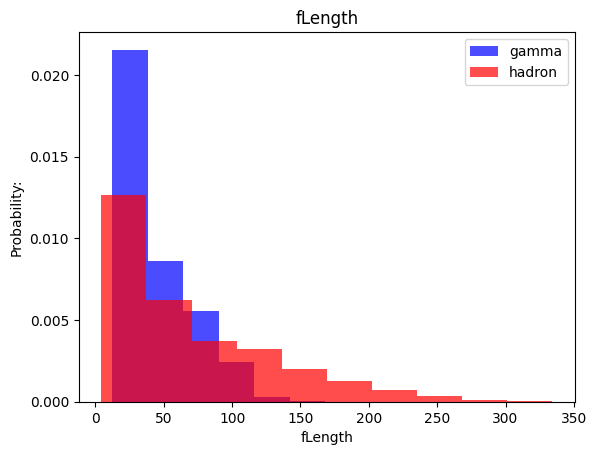

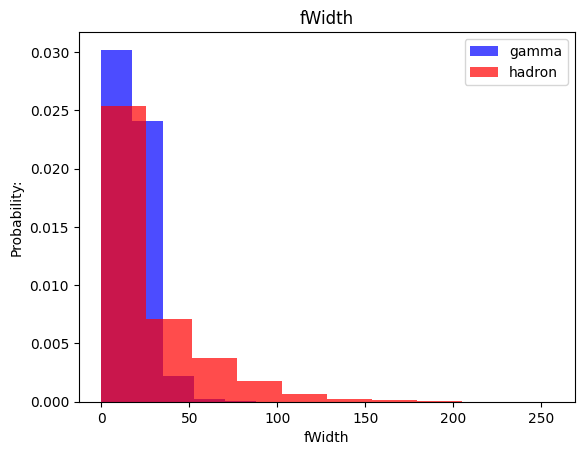

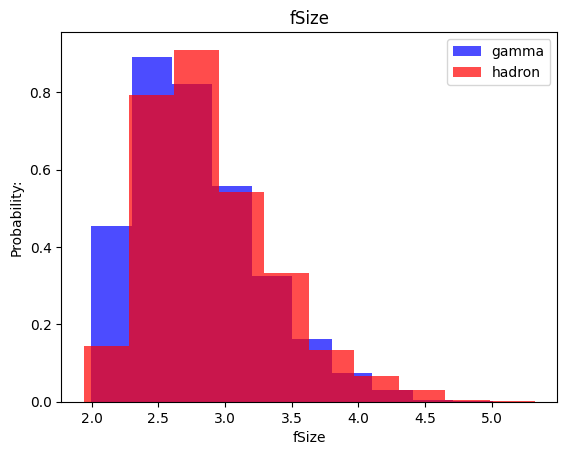

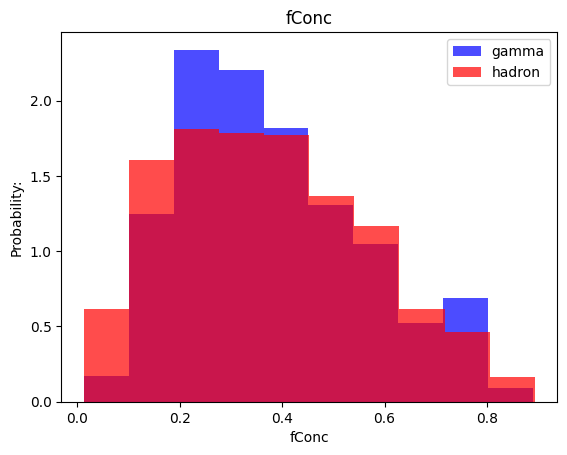

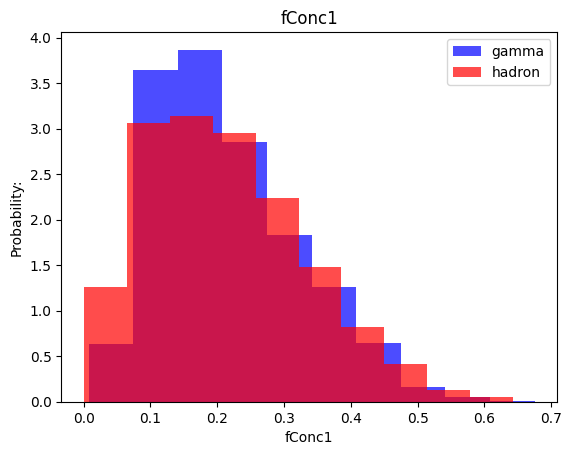

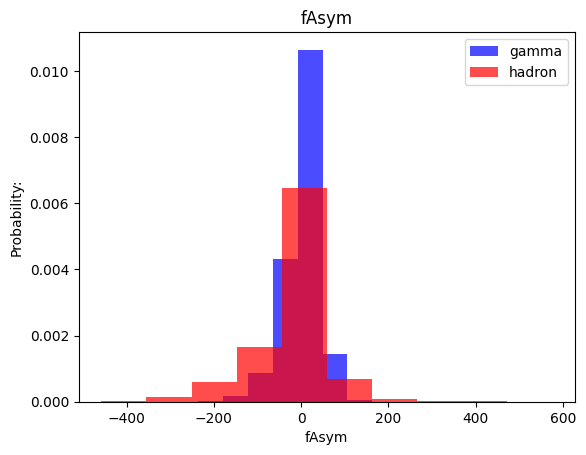

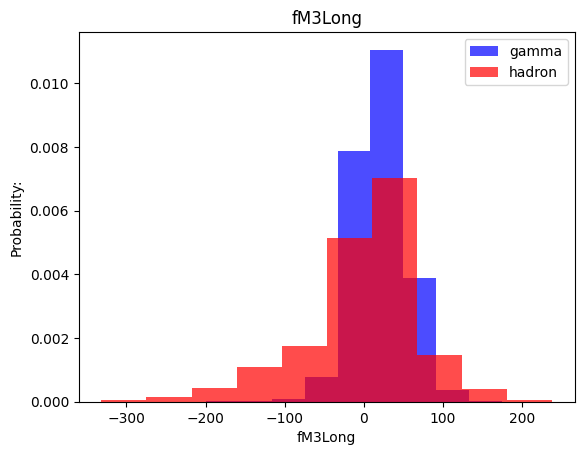

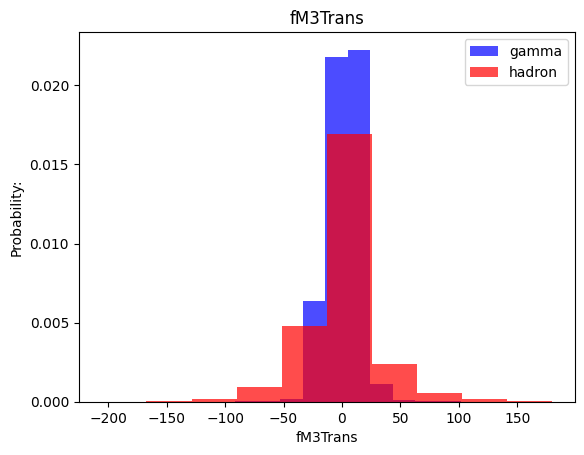

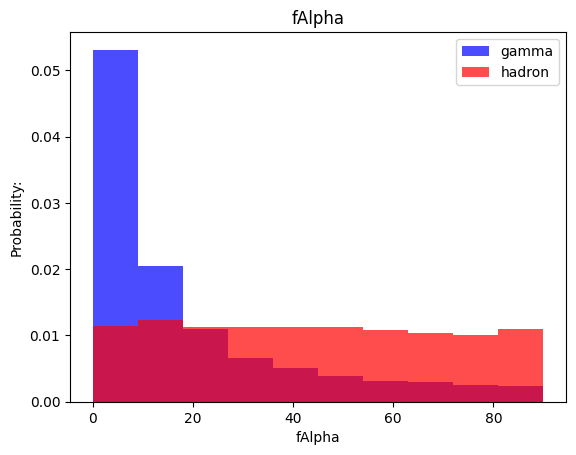

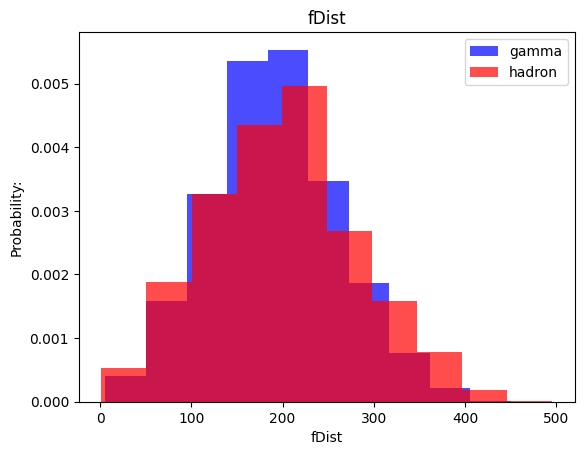

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label],color='blue',label ='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][label],color='red',label ='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability:")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train , validation and Test datasets


In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))
  return data, X, y

In [ ]:
train , X_train, y_train = scale_dataset(train, oversample=True)
valid , X_valid, y_valid = scale_dataset(valid, oversample=False)
test , X_test, y_test = scale_dataset(test, oversample=False)

#kNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1333
           1       0.86      0.87      0.86      2471

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# New Section

#Heart Failure Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
print("Shape of the Data: ", data.shape)

Shape of the Data:  (299, 13)


In [ ]:
print("Information about data: ")
data.info()

Information about data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 3

In [ ]:
print("Describe about Data:")
data.describe()

Describe about Data:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
print(f'Null values: {data.isnull().sum()}')

Null values: age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


Total No. of Living Cases:-  203
Total No. of Dead Cases:-  96


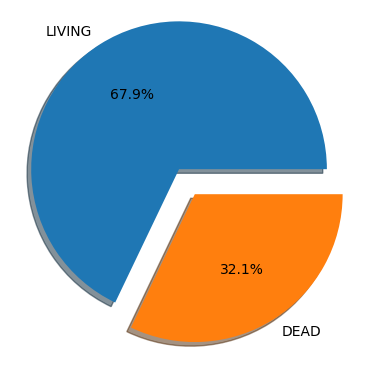

In [ ]:
len_live = len(data["DEATH_EVENT"][data.DEATH_EVENT == 0])
len_dead = len(data["DEATH_EVENT"][data.DEATH_EVENT == 1])

arr = np.array([len_live, len_dead])
labels =["LIVING", "DEAD"]
print("Total No. of Living Cases:- ",len_live)
print("Total No. of Dead Cases:- ",len_dead)

plt.pie(arr, labels=labels, explode =[0.2,0.0],autopct='%1.1f%%', shadow=True)
plt.show()

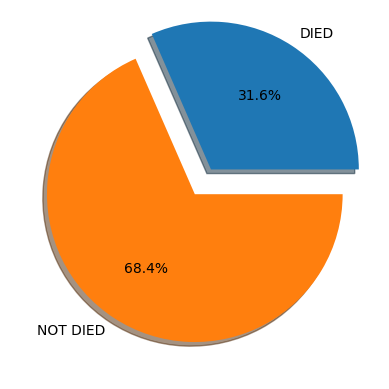

In [ ]:
age_above_50_not_died = data['DEATH_EVENT'][data.age >= 50 ][data.DEATH_EVENT == 0]
age_above_50_died = data['DEATH_EVENT'][data.age > 50 ][data.DEATH_EVENT ==1]
len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)

arr1= [len_died, len_not_died]
labels =['DIED','NOT DIED']
plt.pie(arr1, labels = labels, explode =[0.2,0.0], autopct='%1.1f%%' ,shadow = True)
plt.show()

<ipython-input-25-dbfeb16865c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


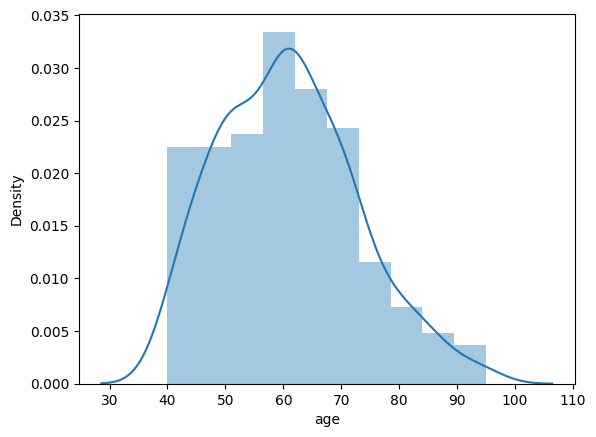

In [ ]:
sns.distplot(data['age'])
plt.show()

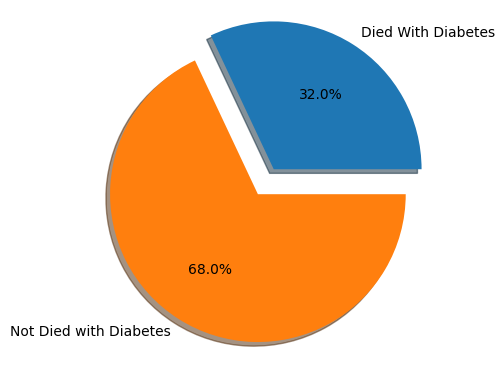

In [ ]:
#Checking for patient data for a person having diabetes
patient_have_diabetes_not_died = data['DEATH_EVENT'][data.diabetes ==1][data.DEATH_EVENT == 0]
patient_have_diabetes_died = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 1]
len_DnotDied= len(patient_have_diabetes_not_died)
len_Ddied = len(patient_have_diabetes_died)
arr2 =[len_Ddied, len_DnotDied]
labels =['Died With Diabetes','Not Died with Diabetes']
plt.pie(arr2, labels = labels, explode =[0.2,0.0], autopct='%1.1f%%' ,shadow = True)
plt.show()

<Axes: >

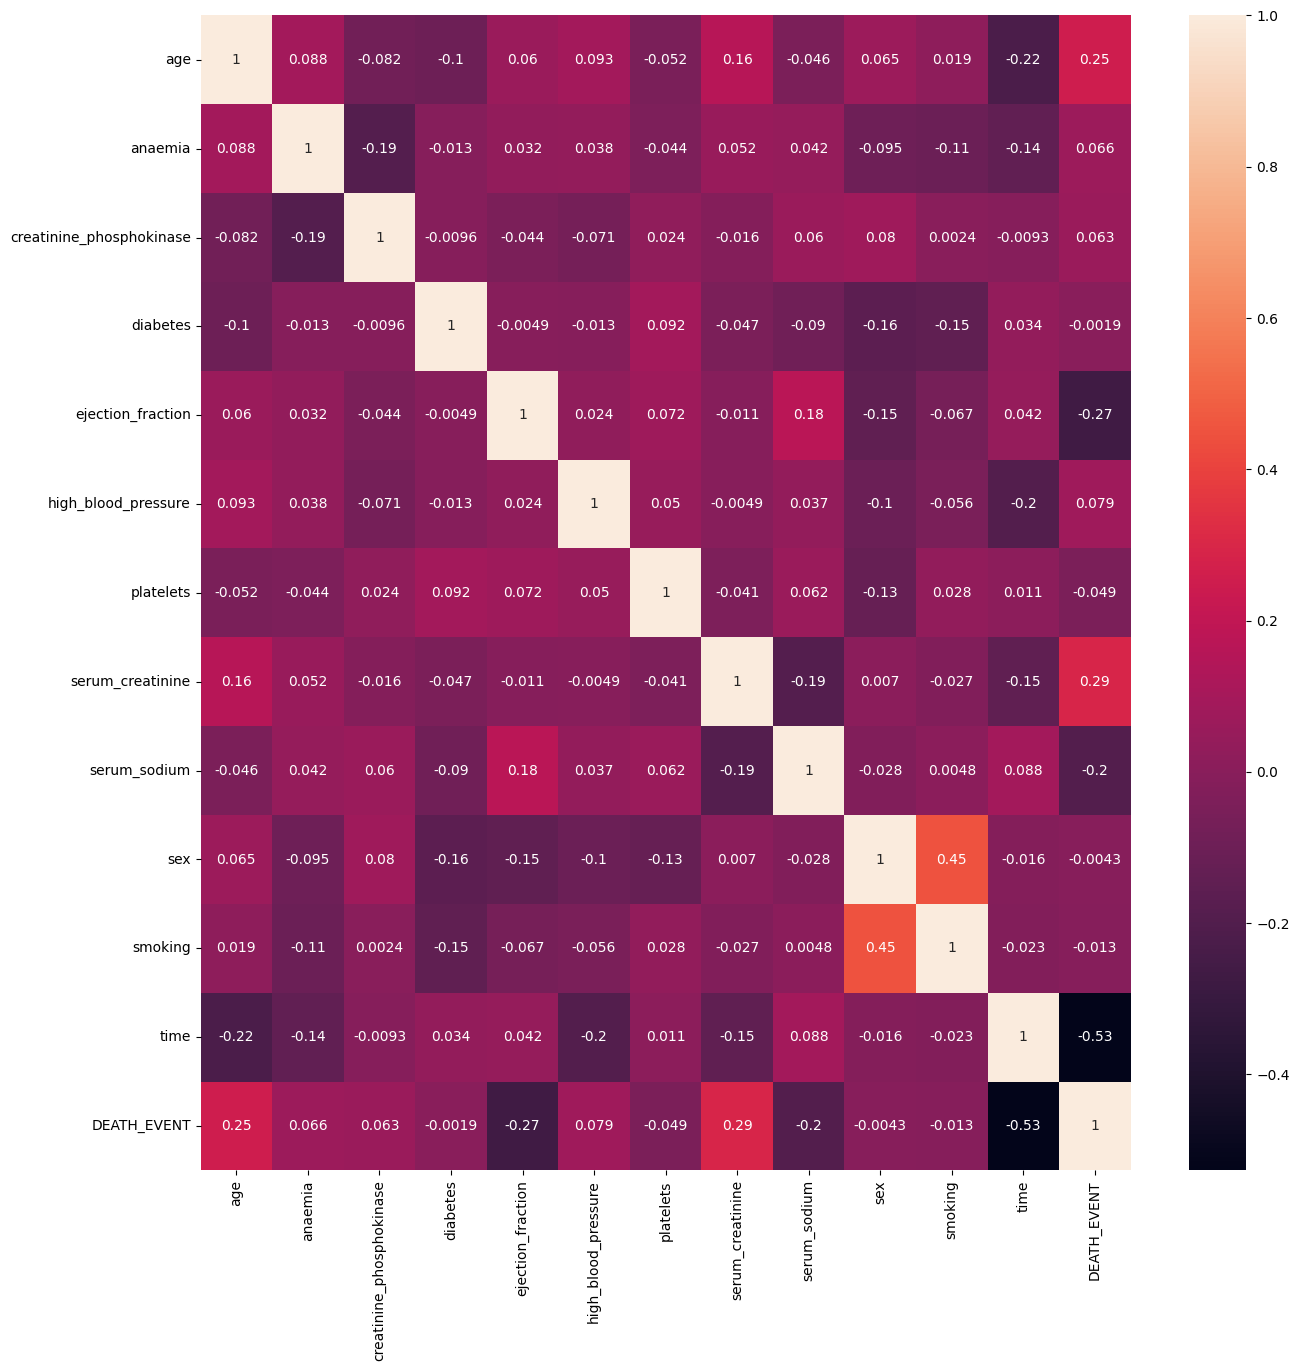

In [ ]:
corr = data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot= True)
#data.corr().style.background_gradient(cmap='coolwarm')



---
# Dataset Development


---







In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop('DEATH_EVENT',axis=1)
y=data["DEATH_EVENT"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)
print("Shape of X-train", x_train.shape)
print("Shape of X-test", x_test.shape)
print("Shape of y-train", y_train.shape)
print("Shape of y-test", y_test.shape)


Shape of X-train (209, 12)
Shape of X-test (90, 12)
Shape of y-train (209,)
Shape of y-test (90,)




---
# Feature Engineering
 #### We will interaction terms, interation terms are the product of two features
---

